# Importing Libraries

In [ ]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-3-7de1611e4133>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Read Data

In [ ]:
# Load the data
data=pd.read_csv('/content/drive/MyDrive/NeuralNets/Combined_data.csv')

# EDA - add more analysis

In [ ]:
data.head()

,X_acc,Y_acc,Z_acc,X_gyr,Y_gyr,Z_gyr,Label
0,4.435275,8.196063,2.974488,0.014215,-0.039157,-0.016744,0.0
1,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,0.0
2,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,0.0
3,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,0.0
4,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,0.0


In [ ]:
data.describe()

,X_acc,Y_acc,Z_acc,X_gyr,Y_gyr,Z_gyr,Label
count,1.345061e+06,1.345061e+06,1.345061e+06,1.345061e+06,1.345061e+06,1.345061e+06,1.345061e+06
mean,6.751456e-01,8.025683e+00,6.103114e+00,2.842174e-03,2.456651e-02,-6.438675e-02,6.116808e-01
std,5.708717e+00,6.896819e+00,5.598800e+00,3.229458e+00,1.578988e+00,7.519560e-01,1.123816e+00
min,-3.915000e+01,-3.897897e+01,-3.150025e+01,-1.162605e+01,-1.219817e+01,-7.321725e+00,0.000000e+00
25%,-1.942086e+00,4.550504e+00,2.143210e+00,-2.027207e+00,-8.018693e-01,-4.469392e-01,0.000000e+00
50%,6.561658e-01,8.727592e+00,5.256651e+00,-8.703608e-01,-2.477821e-02,-2.396951e-02,0.000000e+00
75%,3.335522e+00,1.023084e+01,1.030208e+01,8.058171e-01,8.251345e-01,3.086875e-01,1.000000e+00
max,3.939091e+01,3.949133e+01,3.922252e+01,1.107826e+01,1.228276e+01,8.093803e+00,3.000000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345061 entries, 0 to 1345060
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   X_acc   1345061 non-null  float64
 1   Y_acc   1345061 non-null  float64
 2   Z_acc   1345061 non-null  float64
 3   X_gyr   1345061 non-null  float64
 4   Y_gyr   1345061 non-null  float64
 5   Z_gyr   1345061 non-null  float64
 6   Label   1345061 non-null  float64
dtypes: float64(7)
memory usage: 71.8 MB


<Axes: >

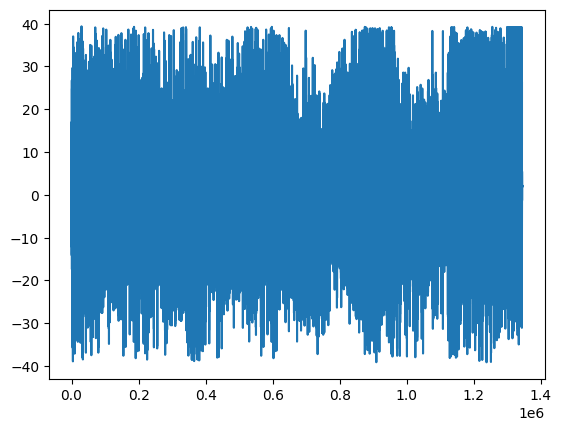

In [ ]:
data['X_acc'].plot()

In [ ]:
data.iloc[0,0]

4.435275

In [ ]:
data['Label'].unique()

array([0., 1., 2., 3.])

In [ ]:
# Assuming your DataFrame is called 'df' and the class labels are in the 'Label' column
class_counts = data['Label'].value_counts()
class_counts

0.0    1006957
3.0     204992
2.0      74660
1.0      58452
Name: Label, dtype: int64

In [ ]:
features = ['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr']
target = ['Label']

In [ ]:
# Split the data into X (features) and y (target)
X = data[features]

# Preprocessing

Different model train different
VAR model trains with the entire set of time series data from which it uderstands the next step or time instance

While LSTM is traditional supervised approach which relies on input and target based training for it modelling

In [ ]:
X_train_var, X_test_var = train_test_split(X, test_size=0.2, shuffle=False)

In [ ]:
X_train_var.shape

(1076048, 6)

In [ ]:
X_test_var.shape

(269013, 6)

# VAR

In [ ]:
# Split the data into training and testing sets
#X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)

# Create and fit the VAR model
model = VAR(endog=X_train_var)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(model_fit.endog, steps=len(X_test_var))

# Print the predictions for the next set of features
print(predictions)

[[ 5.21313665e-01  9.88275740e+00  3.91744502e+00 -1.96308387e+00
  -3.49038737e-01  3.16186741e-01]
 [ 1.94583459e-01  1.02640851e+01  4.49642167e+00 -2.01447816e+00
  -4.17023723e-01  2.34077474e-01]
 [ 2.32078928e-02  1.04516037e+01  4.94486037e+00 -1.97419923e+00
  -4.06371190e-01  1.82135369e-01]
 ...
 [ 4.53515029e-01  8.06197219e+00  6.04390508e+00  4.45861303e-03
   1.83890757e-02 -6.37301843e-02]
 [ 4.53515029e-01  8.06197219e+00  6.04390508e+00  4.45861303e-03
   1.83890757e-02 -6.37301843e-02]
 [ 4.53515029e-01  8.06197219e+00  6.04390508e+00  4.45861303e-03
   1.83890757e-02 -6.37301843e-02]]


In [ ]:
# evaluate forecasts
rmse_var = sqrt(mean_squared_error(X_test_var, predictions))
print('Test RMSE: %.3f' % rmse_var)

Test RMSE: 4.951


# LSTM

In [ ]:
# Split the data into X (features) and y (target)
X = data[features].values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the input sequence length for the LSTM model
input_length = 10

# Prepare the data for LSTM
X_lstm = []
y_lstm = []
for i in range(input_length, len(X_scaled)):
    X_lstm.append(X_scaled[i-input_length:i])
    y_lstm.append(X_scaled[i])
X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

'''# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(input_length, X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(X_train.shape[2]))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')'''



"# Build the LSTM model\nmodel = Sequential()\nmodel.add(LSTM(64, input_shape=(input_length, X_train.shape[2]), return_sequences=True))\nmodel.add(LSTM(32))\nmodel.add(Dense(X_train.shape[2]))\n\n# Compile the model\nmodel.compile(loss='mean_squared_error', optimizer='adam')"

In [ ]:
X_train.shape

(1076040, 10, 6)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(input_length, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[2]))
model.compile(optimizer='adam', loss='mse')

#model.fit(X_train, X_train, epochs=100, batch_size=128, validation_data=(X_test, X_test))


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 64)            18176     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 30,790
Trainable params: 30,790
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_lstm[0].shape

(10, 6)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
26901/26901 [==============================] - 167s 6ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 2/10
26901/26901 [==============================] - 160s 6ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/10
26901/26901 [==============================] - 157s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
26901/26901 [==============================] - 156s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/10
26901/26901 [==============================] - 157s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/10
26901/26901 [==============================] - 157s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/10
26901/26901 [==============================] - 156s 6ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/10
26901/26901 [==============================] - 157s 6ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/10
26901/26901 [==============================] - 155s 6ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/10
26901/26901 [=====================

# Saving Model

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
# model.save("/content/drive/MyDrive/Startup/LSTM")
import keras
# It can be used to reconstruct the model identically.
model = keras.models.load_model("/content/drive/MyDrive/Startup/LSTM")

# LSTM Evalution

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Denormalize the predictions
predictions = scaler.inverse_transform(predictions)

# Print predicted and actual values
'''for i in range(len(predictions)):
    print('predicted=%s, expected=%s' % (predictions[i], scaler.inverse_transform(y_test[i].reshape(1, -1))))
'''

8407/8407 [==============================] - 25s 3ms/step


"for i in range(len(predictions)):\n    print('predicted=%s, expected=%s' % (predictions[i], scaler.inverse_transform(y_test[i].reshape(1, -1))))\n"

In [ ]:
loss

0.0017219040310010314

In [ ]:
predictions[0]

array([ 0.53398675, 12.463691  ,  1.8476739 , -2.9463582 , -1.0433022 ,
        0.67017925], dtype=float32)

In [ ]:
predictions.shape

(269011, 6)

In [ ]:
test=[]
for i in range(len(predictions)):
    test.append(scaler.inverse_transform(y_test[i].reshape(1, -1)))


In [ ]:
#test=scaler.inverse_transform(y_test[0].reshape(1, -1))

In [ ]:
test=np.array(test)
test=test.reshape(269011, 6)

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.861


In [ ]:
#rmse_cnn, rmse, rmse_var
import pandas as pd

data = [
    ['VAR', rmse_var],
    ['LSTM', rmse],
    ['CNN', rmse_cnn],
]

df = pd.DataFrame(data, columns=['Model', 'RMSE'])


In [ ]:
df

,Model,RMSE
0,VAR,4.950549
1,LSTM,2.861388
2,CNN,3.178774


# Exponontial Smoothing

In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#dt=data.iloc[:,:-1]
# Reshape the data to have 1 dimension
dt = data.iloc[:,:-1].values.reshape(-1)

# Create an exponential smoothing model
model = ExponentialSmoothing(dt, trend='additive', seasonal='additive', seasonal_periods=7)

# Fit the model to the data
model.fit()

# Make predictions
predictions = model.predict(start=N, end=N + rows - 1)

# Plot the data and predictions
plt.plot(data, label='Data')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

# CNN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

In [ ]:
# Reshape the data to have 3 dimensions
#data = data.reshape(-1, 1, 7)

# Create the model
cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(input_length, X_train.shape[2])))
cnn.add(Flatten())
cnn.add(Dense(X_train.shape[2], activation='linear'))

# Compile the model
cnn.compile(optimizer='adam', loss='mse')

# Fit the model to the data
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
33627/33627 [==============================] - 142s 4ms/step - loss: 0.0018
Epoch 2/10
33627/33627 [==============================] - 113s 3ms/step - loss: 0.0014
Epoch 3/10
33627/33627 [==============================] - 104s 3ms/step - loss: 0.0013
Epoch 4/10
33627/33627 [==============================] - 102s 3ms/step - loss: 0.0013
Epoch 5/10
33627/33627 [==============================] - 101s 3ms/step - loss: 0.0013
Epoch 6/10
33627/33627 [==============================] - 103s 3ms/step - loss: 0.0013
Epoch 7/10
33627/33627 [==============================] - 100s 3ms/step - loss: 0.0013
Epoch 8/10
33627/33627 [==============================] - 102s 3ms/step - loss: 0.0012
Epoch 9/10
33627/33627 [==============================] - 101s 3ms/step - loss: 0.0012
Epoch 10/10
33627/33627 [==============================] - 101s 3ms/step - loss: 0.0012


In [ ]:
import keras
#cnn.save("/content/drive/MyDrive/Startup/CNN")

# It can be used to reconstruct the model identically.
cnn = keras.models.load_model("/content/drive/MyDrive/Startup/CNN")

In [ ]:
# Make predictions
#predictions = cnn.predict(X_test)

# Evaluate the model
loss_cnn = cnn.evaluate(X_test, y_test)

# Make predictions
predictions_cnn = cnn.predict(X_test)

# Denormalize the predictions
predictions_cnn = scaler.inverse_transform(predictions_cnn)


8407/8407 [==============================] - 14s 2ms/step


In [ ]:
# evaluate forecasts
rmse_cnn = sqrt(mean_squared_error(test, predictions_cnn))
print('Test RMSE for CNN: %.3f' % rmse_cnn)

Test RMSE for CNN: 3.179
